In [4]:
import pandas as pd
import json
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jrdak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
#to convert to a dataframe
with open('data/gn.json') as json_file:
  articles = json.load(json_file)

articles = [a["title"] for a in articles]
articles = pd.DataFrame(articles,columns=['articles_title'])

In [4]:
d = pd.read_json('data/gn.json')
d

,title
0,Pfizer executive admits COVID-19 vaccine was n...
1,Coronavirus (COVID-19) Update: FDA Authorizes ...
2,Pfizer-BioNTech Marauded Moderna Over COVID-19...
3,Company of the Year 2022: Pfizer – Building on...
4,Pfizer and BioNTech Submit Application to U.S....
...,...
95,"What's next for Pfizer, Moderna beyond their p..."
96,Pfizer and BioNTech start trial of 'next-gen' ...
97,"Pfizer quarterly sales surge to record high, d..."
98,Pfizer's Novel COVID-19 Oral Antiviral Treatme...


In [86]:
#to convert to a dataframe
with open('data/tt.json') as json_file:
  tt = json.load(json_file)

tt = [a['content']for a in tt]
tt = pd.DataFrame(tt,columns=['content'])

tt

,content
0,Pfizer CEO'su aşıların bulaşı önleyici testler...
1,"Fasonlara ve masonlara, bir de milletini küres..."
2,#Pfizer https://t.co/2g3KHdzd6y
3,"People's lives were literally destroyed, kids'..."
4,Suyun ısındı!\n#Pfizer \n#Biontech \n#snovac\n...
...,...
95,@telegraaf Doe normaal! In het europees parlem...
96,@azinlikca İnsanlara yapılan aşılarda seninde ...
97,Pfizer executive admits under oath that the Co...
98,They feed you nothing but lies. Le lona la kha...


### Tokenization

Transferring strings into a single textual token.

In [6]:
import re

def custom_split(sep_list ,  to_split):
    #we create dynamical regular expression
    regular_exp = '|'.join(map(re.escape, sep_list))
    return re.split(regular_exp, to_split)

In [7]:
#removing stopwords & punctuation
from nltk.corpus import stopwords
import string

stop_words = set(stopwords.words('english'))

string.punctuation = string.punctuation +'"'+'"'+'-'+'''+'''+'—'
# string.punctuation

removal_list = list(stop_words) + list(string.punctuation) #+ ['lt','rt']
removal_list


['nor',
 'you',
 "shouldn't",
 'or',
 'hadn',
 'isn',
 'ain',
 'its',
 'won',
 'out',
 'should',
 'further',
 'under',
 'up',
 "mustn't",
 'here',
 'having',
 'if',
 'how',
 'what',
 'which',
 'y',
 'itself',
 'so',
 'yourselves',
 'but',
 'and',
 'wasn',
 'before',
 "mightn't",
 'be',
 'themselves',
 'most',
 'yours',
 'it',
 'into',
 "weren't",
 'whom',
 'wouldn',
 'didn',
 'same',
 'are',
 'had',
 'hers',
 "she's",
 'our',
 'each',
 'll',
 "you'd",
 "hasn't",
 'yourself',
 'any',
 'during',
 'ourselves',
 'mustn',
 'being',
 'of',
 "that'll",
 'shan',
 'while',
 'have',
 'when',
 'just',
 "aren't",
 'own',
 "should've",
 'couldn',
 'mightn',
 'too',
 "hadn't",
 "you've",
 'than',
 'did',
 'after',
 "haven't",
 'down',
 'has',
 'both',
 'such',
 'them',
 'no',
 'other',
 'i',
 'needn',
 "wouldn't",
 'your',
 'does',
 'again',
 'been',
 'me',
 "you're",
 'through',
 "shan't",
 'between',
 'until',
 'in',
 'do',
 'very',
 "isn't",
 "needn't",
 'am',
 'more',
 'to',
 "wasn't",
 'hasn',


In [8]:
words = []
for title in articles.articles_title :
    for word in custom_split(string.punctuation,title):
        for w in word.split():
            words.append(w)

(words)

['Pfizer',
 'executive',
 'admits',
 'COVID',
 '19',
 'vaccine',
 'was',
 'never',
 'tested',
 'for',
 'transmission',
 'prevention',
 'Coronavirus',
 'COVID',
 '19',
 'Update',
 'FDA',
 'Authorizes',
 'Moderna',
 'and',
 'Pfizer',
 'BioNTech',
 'Bivalent',
 'COVID',
 '19',
 'Vaccines',
 'for',
 'Use',
 'as',
 'a',
 'Booster',
 'Dose',
 'in',
 'Younger',
 'Age',
 'Groups',
 'Pfizer',
 'BioNTech',
 'Marauded',
 'Moderna',
 'Over',
 'COVID',
 '19',
 'Vaccine',
 'Company',
 'of',
 'the',
 'Year',
 '2022',
 'Pfizer',
 '–',
 'Building',
 'on',
 'COVID',
 '19',
 '–',
 'PharmaLive',
 'Pfizer',
 'and',
 'BioNTech',
 'Submit',
 'Application',
 'to',
 'U',
 'S',
 'FDA',
 'for',
 'Emergency',
 'Use',
 'Authorization',
 'of',
 'Omicron',
 'BA',
 '4',
 'BA',
 '5',
 'Adapted',
 'Bivalent',
 'Vaccine',
 'Booster',
 'in',
 'Children',
 '5',
 'Through',
 '11',
 'Years',
 'of',
 'Age',
 'Pfizer',
 'and',
 'the',
 'U',
 'S',
 'have',
 'slimmed',
 'down',
 'a',
 'COVID',
 'shot',
 'donation',
 'deal',
 'P

In [9]:
def remove_stopwords(word_list):     
    y = []
    for word in word_list:
        if word in removal_list:
            pass
        else:
            y.append(word)
    return (y)

In [10]:
words = remove_stopwords(words)
len(words)

1199

### Compound word identification

Identifying words with a joint meaning that gets lost word

### Normalization and noise reduction
Reducing the dimensionality of Document‐Term‐Matrix 

#### Stemming

In [61]:
#stemming's modules
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from nltk.stem.snowball import SnowballStemmer


In [62]:
# ps = PorterStemmer()
# for w in words:
#     print(w, " : ", ps.stem(w))

sbs = SnowballStemmer("english")
for w in words:
    print(w, " : ", sbs.stem(w))


Pfizer  :  pfizer
executive  :  execut
COVID  :  covid
19  :  19
vaccine  :  vaccin
was  :  was
never  :  never
tested  :  test
for  :  for
transmission  :  transmiss
prevention  :  prevent
Coronavirus  :  coronavirus
COVID  :  covid
19  :  19
Update  :  updat
FDA  :  fda
Authorizes  :  author
Moderna  :  moderna
and  :  and
Pfizer  :  pfizer
BioNTech  :  biontech
Bivalent  :  bival
COVID  :  covid
19  :  19
Vaccines  :  vaccin
for  :  for
Use  :  use
Booster  :  booster
Dose  :  dose
in  :  in
Younger  :  younger
Age  :  age
Groups  :  group
Pfizer  :  pfizer
BioNTech  :  biontech
Marauded  :  maraud
Moderna  :  moderna
Over  :  over
COVID  :  covid
19  :  19
Vaccine  :  vaccin
Company  :  compani
of  :  of
the  :  the
Year  :  year
2022  :  2022
Pfizer  :  pfizer
–  :  –
Building  :  build
on  :  on
COVID  :  covid
19  :  19
–  :  –
PharmaLive  :  pharmal
Pfizer  :  pfizer
and  :  and
BioNTech  :  biontech
Submit  :  submit
Application  :  applic
U  :  u
S  :  s
FDA  :  fda
for  :  f

#### Lemmatization

reduces the inflected words properly ensuring that the root word belongs to the language

In [65]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()
for w in words:
    print(w, " : ", wnl.lemmatize(w,pos="v"))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jrdak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Pfizer  :  Pfizer
executive  :  executive
COVID  :  COVID
19  :  19
vaccine  :  vaccine
was  :  be
never  :  never
tested  :  test
for  :  for
transmission  :  transmission
prevention  :  prevention
Coronavirus  :  Coronavirus
COVID  :  COVID
19  :  19
Update  :  Update
FDA  :  FDA
Authorizes  :  Authorizes
Moderna  :  Moderna
and  :  and
Pfizer  :  Pfizer
BioNTech  :  BioNTech
Bivalent  :  Bivalent
COVID  :  COVID
19  :  19
Vaccines  :  Vaccines
for  :  for
Use  :  Use
Booster  :  Booster
Dose  :  Dose
in  :  in
Younger  :  Younger
Age  :  Age
Groups  :  Groups
Pfizer  :  Pfizer
BioNTech  :  BioNTech
Marauded  :  Marauded
Moderna  :  Moderna
Over  :  Over
COVID  :  COVID
19  :  19
Vaccine  :  Vaccine
Company  :  Company
of  :  of
the  :  the
Year  :  Year
2022  :  2022
Pfizer  :  Pfizer
–  :  –
Building  :  Building
on  :  on
COVID  :  COVID
19  :  19
–  :  –
PharmaLive  :  PharmaLive
Pfizer  :  Pfizer
and  :  and
BioNTech  :  BioNTech
Submit  :  Submit
Application  :  Application
U  

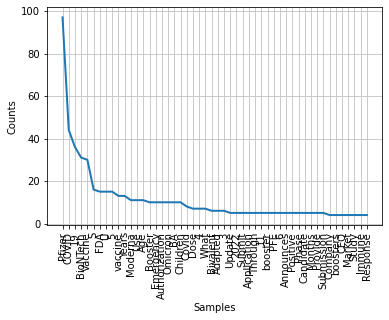

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [11]:
from nltk import FreqDist
import matplotlib.pyplot as plt

freq_w = FreqDist(words)
freq_w.plot(50)
# plt.plot(freq_w)
# plt.show()

In [12]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

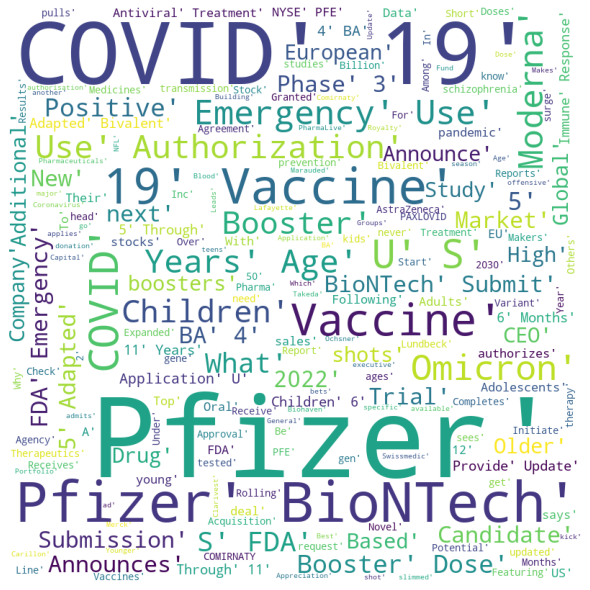

In [13]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(str(words))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()